# Automobile
The Data set I will be using is a set that contains specifications of  205 different cars.

I have a data frame with 205 rows and 26 variables:
* symboling - (-3 -- 3)
* normalized-losses - (65 -- 256)
* make - Varies brand
* fuel-type - type of fule (diesel, gas)
* aspiration - 
* num-of-door - number of door (two doors or four doors)
* body-style hardtop, wagon, sedan, hatchback, convertible
* drive-wheels - 4wd, fwd, rwd
* engine-location - front,rear
* wheel-base - horizontal distance between the center of the front and rear wheels range(86.6, 120,9)
* length - length in inches (141.1,208.1)
* width - widht in inches (60.3,72.3)
* height - height in inches (47.8,59.8)
* curb-weight - weight in lbs (1488,4066) 
* engine-type - dohc, dohcv, l, ohc, ohcf, ohcv, rotor
* num-of-cylinders - eight, five, four, six, three, twelve, two
* engine-size - (61,326)
* fuel-system - help transfer feul from the tank to the engine for combustion. 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi,spfi
* bore - diameter of each cylinder (2.54 -- 3.94)
* stroke - the time of the piston moves from the top center to the bottom of the cylinder. (2.07 -- 4.17)
* compression-ratio - ratio of the volume of the cylinder (7 -- 23)
* horsepower - horsepower range (48 -- 288)
* peak-rpm - (4150 -- 6600)
* city-mpg -  mile per gallon in city (13 -- 49)
* highway-mpg - mile per gallon in highway (16 -- 54)
* price - price in US dollars (5118 -- 45400)

## **Analysis of Various Features**
* symboling - the degree to which the auto is more risky than its price indicates.
* normalized - losses the relative average loss payment per insured vehicle year. 

## Data Summary and EDA


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from sklearn.dummy import DummyRegressor
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type',
           'aspiration', 'num-of-door', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv('https://raw.githubusercontent.com/zcolley/cs381-MatthewFried/main/quiz/imports-85.data',
                 names=headers)
q3 = df.copy()
print(df.shape)
df.head(10)


(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-door,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [28]:
# this matches with information that is given.
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-door            3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [29]:
# data type of each attribute
# list of attribute that is numerical: symboling, wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, city-mpg, highway-mpg.
# list of the categorical types: normalized-looses, make, fuel-type, aspiration, num-of-door, body-style, drive-wheels, engine-location, engine-type, fuel-system, bore, stroke, horsepower, peak-rpm, price.
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-door           object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [30]:
# to see if there is missing value in each column
# it seems like there is no missing value, but from above dataframe there is value with ?.

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-door          0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [31]:
# to count how many '?' in each column 
# from this I can see: 
#   there are 41 rows in the normalized-losses column value with '?'
#   there are 2 rows in the num-of-door column value with '?'
#   there are 4 rows in the bore column value with '?'
#   there are 4 rows in the stroke column value with '?'
#   there are 2 rows in the horsepower column value with '?'
#   there are 2 rows in the peak-rpm column value with '?'
#   there are 4 rows in the price column value with '?'
df[df =='?'].count()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-door           2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [32]:
# check if there is another non sense value other than ?
vals = df[['normalized-losses', 'make',
           'fuel-type', 'aspiration', 'num-of-door', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore',  'peak-rpm', 'price']].copy()

for x in range(len(vals.columns)):
    print(vals.columns[x] + ':')
    print(vals[vals.columns[x]].unique())
    print('')

print(set(df['horsepower'].tolist()))
print(set(df['stroke'].tolist()))

normalized-losses:
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type:
['gas' 'diesel']

aspiration:
['std' 'turbo']

num-of-door:
['two' 'four' '?']

body-style:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels:
['rwd' 'fwd' '4wd']

engine-location:
['front' 'rear']

engine-type:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

num-of-cylinders:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuel-system:
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

bore:
['3.47' '2.68'

<AxesSubplot:title={'center':'Brands of Cars'}>

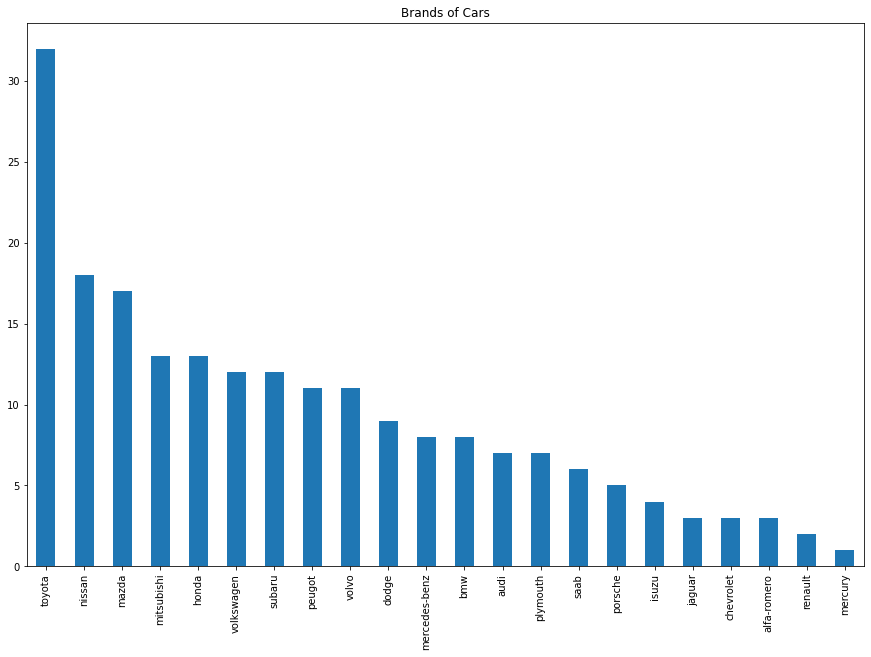

In [33]:
# check car for each brand
plt.figure(figsize=(15,10))
make_bar = df['make'].value_counts().plot.bar(title ='Brands of Cars')
make_bar

<AxesSubplot:title={'center':'body-style'}>

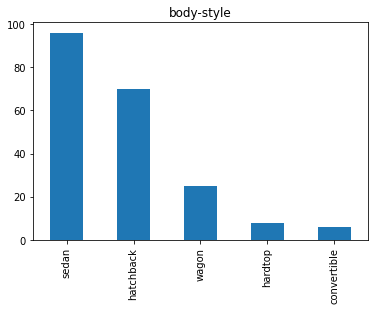

In [34]:
# check which body-style is popular among in the data set
body_style = df['body-style'].value_counts().plot.bar(title ='body-style')
body_style


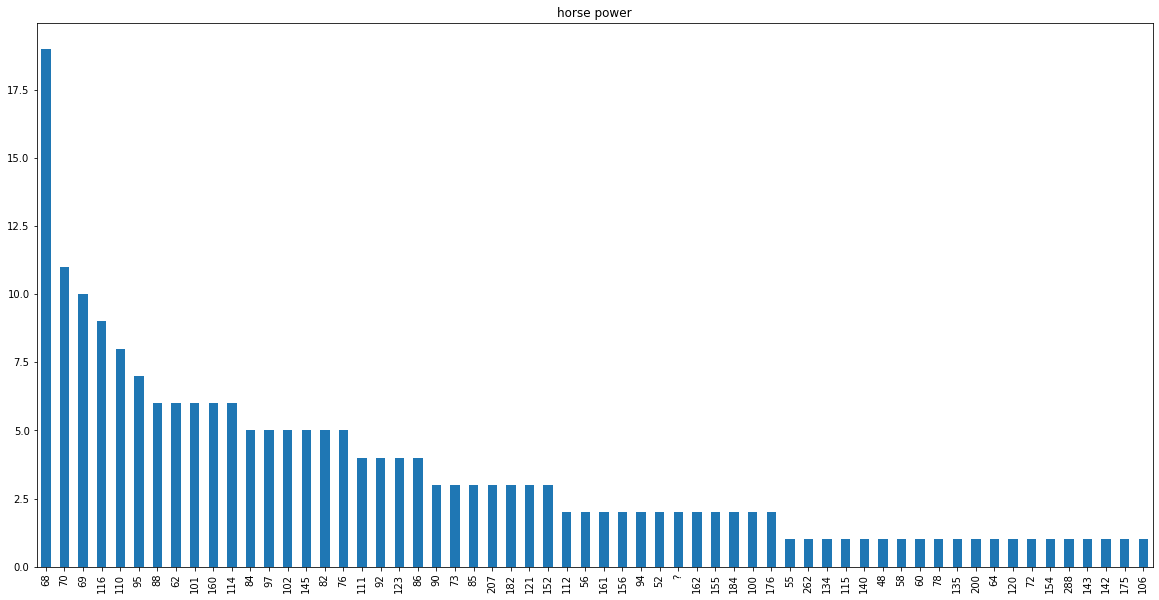

In [35]:
# check which horsepower that most people likes.
plt.figure(figsize=(20,10))


horse = df['horsepower'].value_counts().plot.bar(title = 'horse power')


<AxesSubplot:title={'center':'Risk Rating'}>

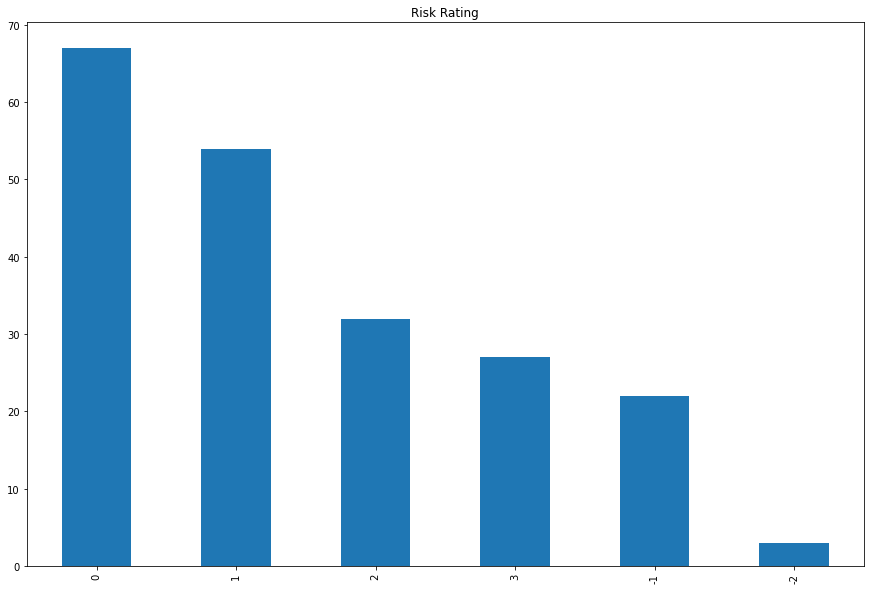

In [36]:
# check cars land in which risk rating category
plt.figure(figsize=(15, 10))
rist_rating = df['symboling'].value_counts().plot.bar(title ='Risk Rating')
rist_rating

<AxesSubplot:title={'center':'Fuel Type'}>

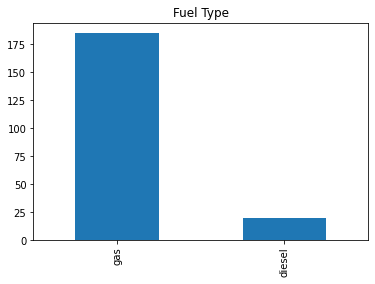

In [37]:
# check fuel type
fuel_type = df['fuel-type'].value_counts().plot.bar(title = 'Fuel Type')
fuel_type

<AxesSubplot:title={'center':'Aspiration Type'}, ylabel='aspiration'>

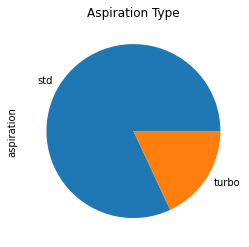

In [38]:
# check aspiration type

aspiration = df['aspiration'].value_counts().plot.pie(title = 'Aspiration Type')
aspiration


#### Finding
- Toyota makes most cars in this data set, Nissan second.
- Most prefered Aspiration type is standar.
- Most prefered feul type is gas.
- Most risk rating is 0.
- Most prefered horsepower is 68.
- Most prefered number of doot is 4.
- Most prefered sedan as body style.

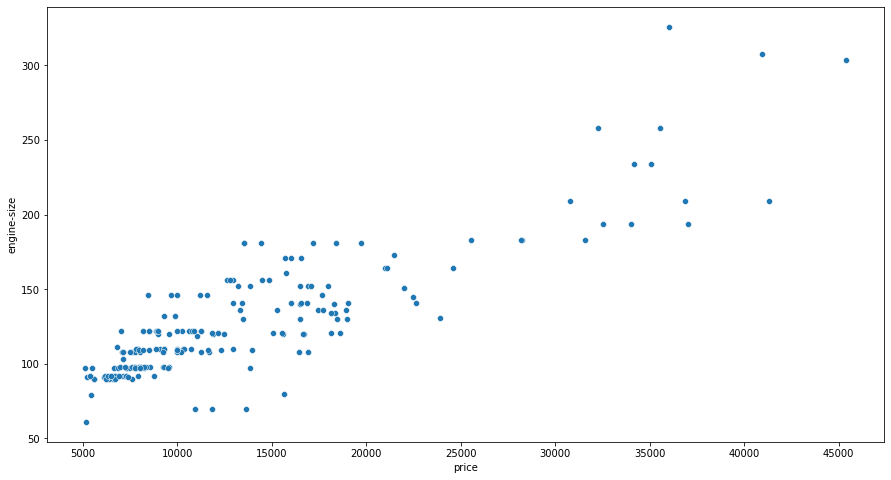

In [39]:
# see the relation between price and engine size
import seaborn as sns

plt.figure(figsize=(15, 8))
df['price'] = pd.to_numeric(df['price'],errors='coerce').astype('float')
df['engine-size'] = pd.to_numeric(df['engine-size'], errors='coerce').astype('float')
data = df[['price','engine-size']].copy()

g = sns.scatterplot(data=data,x = 'price',y = 'engine-size');



From the above graph, I can see that the larger the engine size, the more expensive it is. Most cars are in the 5000 to 18000 price range, and engine sizes are in the 60 to 180 range.

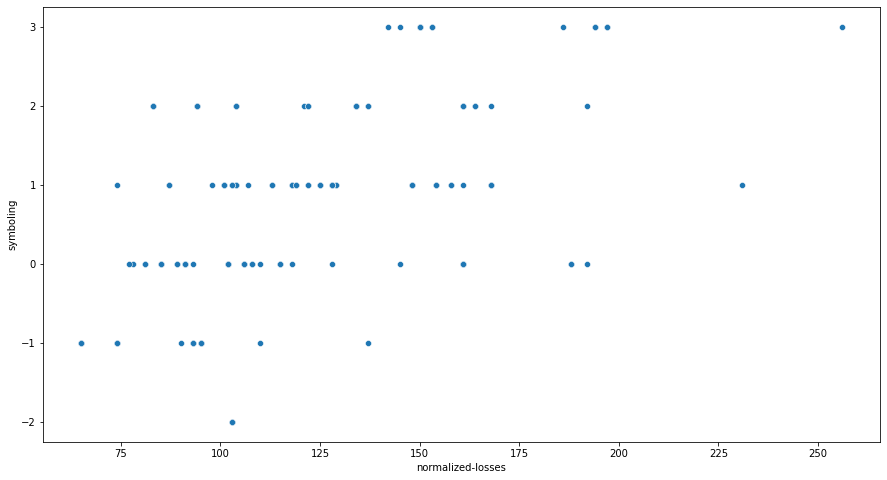

In [40]:
# check the relation between symboling and normalized loose
df['symboling'] = pd.to_numeric(
    df['symboling'], errors='coerce').astype('float')
df['normalized-losses'] = pd.to_numeric(
    df['normalized-losses'], errors='coerce').astype('float')
plt.figure(figsize=(15, 8))
data = df[['symboling', 'normalized-losses']]
g = sns.scatterplot(data=data, x='normalized-losses', y= 'symboling')


<AxesSubplot:xlabel='make', ylabel='price'>

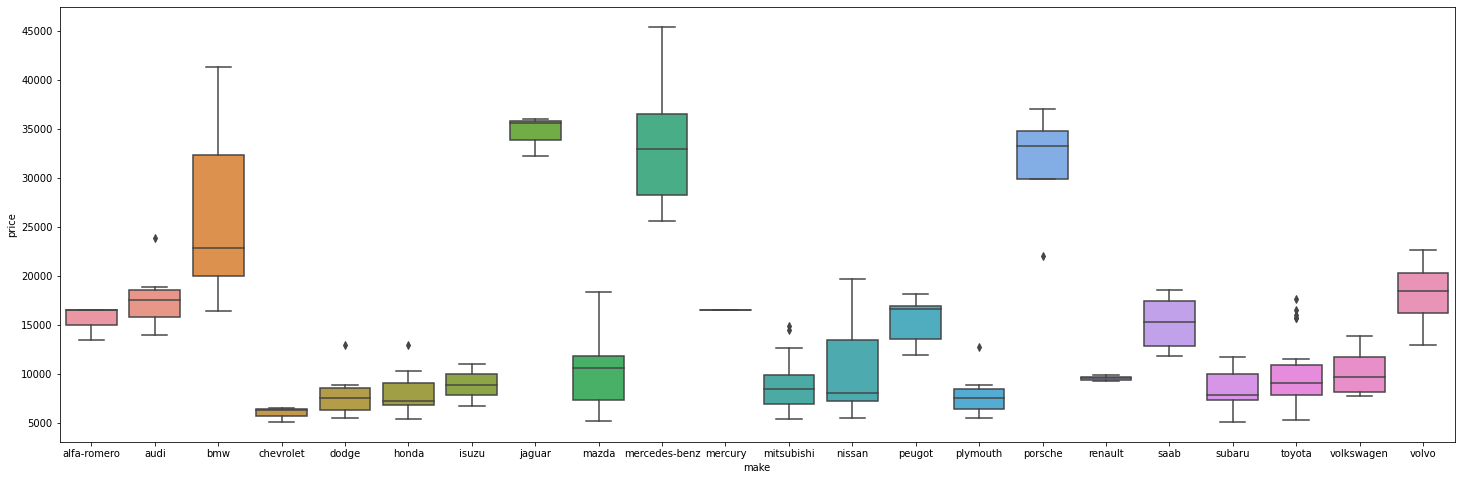

In [41]:
plt.figure(figsize=(25, 8))
vals = df[['make','price']].copy()
sns.boxplot(data =vals,x = 'make',y = 'price')

From the above boxplot there are some outlier for some brands, but it is in some reasonable range.

#### Heatmap

<AxesSubplot:>

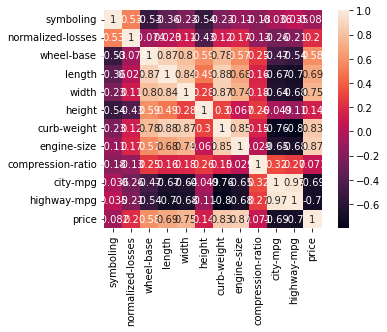

In [42]:
corr = df.corr()
sns.heatmap(data = corr, square=True, annot = True, cbar = True)

From the above graph
1. Car price is related to engine size, curb weight, width, and length.
2. Engine size is related to width, length, and curb weight.
2. wheel base is related to length, width and curb weight.

In [43]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


#### EDA Summary 
There are some missing values, but it is ok. No big outliers, and reasonable data value overall. Price is related to engine size and car size. Most people prefered sedan style over other styles, and most fuel type is gas. The car price depends on engine size, curb weight, width, and length.  Engine size also depends on the size of a car. If a car's symboling is high then its normalized losses is also high.

In [44]:
# change column value with ? to by its column median

cp_df = df.copy()

# cp_df['normalized-losses'].fillna(cp_df['normalized-losses'].median(),inplace=True)

# for val in cp_df:
#     cp_df[val].replace(['?'], [cp_df[val].value_counts().index[0]],inplace=True)


cp_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-door,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Question 1
list of attribute that is numerical: symboling, wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, city-mpg, highway-mpg.

- symboling  require to perform binarizer scaling because its range from -3 to 3, but I can simply set threshold to 0 everything below 0 is -1 else is 1.
- wheel base also require to perform a scaling because its range is wide, it cant fit into machine model. I think min-max method is good for this feature.
- length, width, height,curb-weight, engine size should not perform any scaling because it is kinda meaningful. because each one of them represent size of a car.



#### Question 2

There are 4 missing value in price column and 2 missing value in num-of-door column.



In [45]:

df_cp = df

le = LabelEncoder()

df_cp['make'] = le.fit_transform(df_cp['make'])
df_cp['body-style'] = le.fit_transform(df_cp['body-style'])
df_cp['drive-wheels'] = le.fit_transform(df_cp['drive-wheels'])
df_cp['engine-type'] = le.fit_transform(df_cp['engine-type'])
df_cp['num-of-cylinders'] = le.fit_transform(df_cp['num-of-cylinders'])
df_cp['fuel-system'] = le.fit_transform(df_cp['fuel-system'])
df_cp['peak-rpm']= le.fit_transform(df_cp['peak-rpm'])
df_cp['horsepower'] = le.fit_transform(df_cp['horsepower'])


df_cp['num-of-door']






df_cp = df_cp.drop(['fuel-type', 'aspiration', 'engine-location'], axis=1)

df_cp.isnull().sum()

symboling             0
normalized-losses    41
make                  0
num-of-door           0
body-style            0
drive-wheels          0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

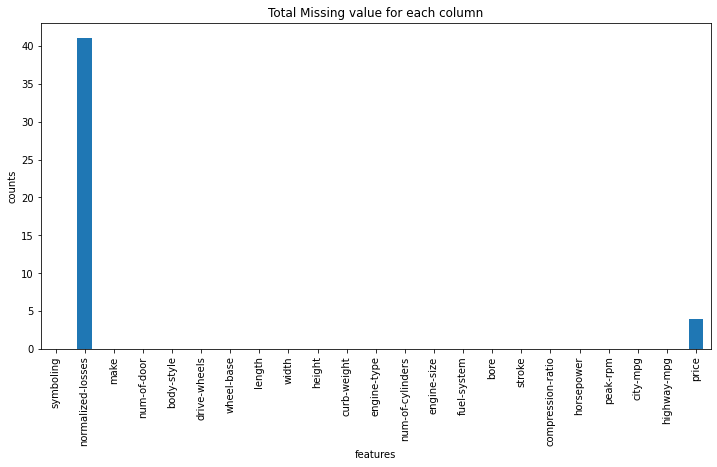

In [46]:
df_cp.isnull().sum().plot.bar(figsize=(12,6))
plt.title('Total Missing value for each column')
plt.xlabel('features')
plt.ylabel('counts')
df_cp.drop(['bore'], axis=1, inplace=True)
df_cp.drop(['stroke'], axis=1, inplace=True)
df_simple = df_cp.copy()
df_it = df_cp.copy()

0       two
1       two
2       two
3      four
4      four
5       two
6      four
7      four
8      four
9       two
10      two
11     four
12      two
13     four
14     four
15     four
16      two
17     four
18      two
19      two
20     four
21      two
22      two
23      two
24     four
25     four
26     four
27        ?
28     four
29      two
30      two
31      two
32      two
33      two
34      two
35     four
36     four
37      two
38      two
39     four
40     four
41     four
42      two
43     four
44      two
45     four
46      two
47     four
48     four
49      two
50      two
51      two
52      two
53     four
54     four
55      two
56      two
57      two
58      two
59      two
60     four
61      two
62     four
63        ?
64     four
65     four
66     four
67     four
68     four
69      two
70     four
71     four
72      two
73     four
74      two
75      two
76      two
77      two
78      two
79      two
80      two
81      two
82      two
83  

#### Question 3


{'whiskers': [<matplotlib.lines.Line2D at 0x7f922d371760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f922d371d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f922d3715b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f922d3872e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f922d3875b0>],
 'means': []}

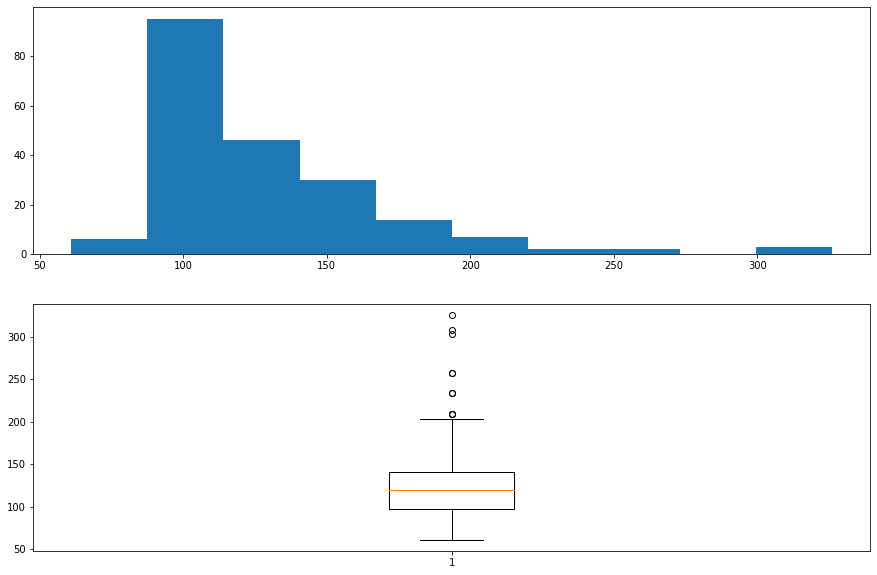

In [3]:
# graph of original data of engine size
df_q3 = q3.copy()
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(df_q3['engine-size'])
plt.subplot(2,1,2)
plt.boxplot(df_q3['engine-size'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9439ce5130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9439ce56d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9439cd9e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9439ce5b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9439ce5e20>],
 'means': []}

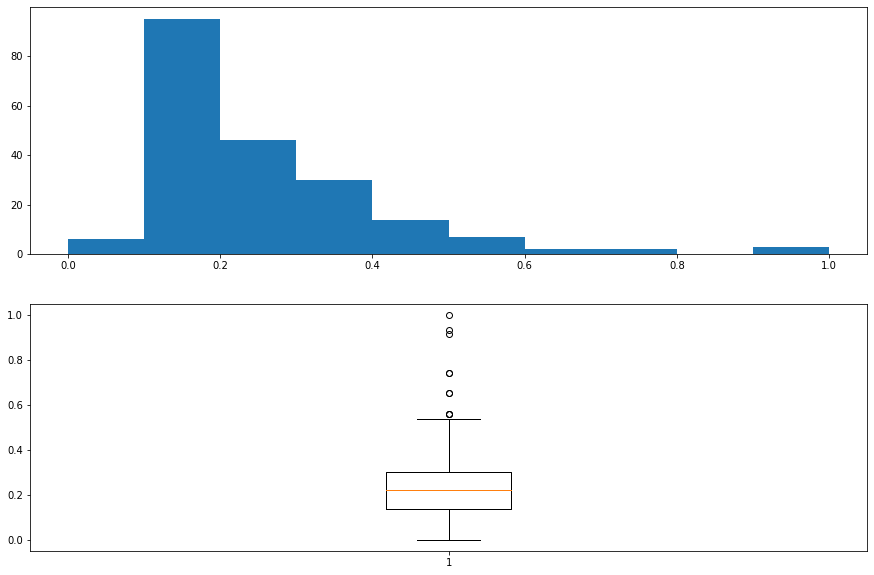

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_q3['engine-size'] = scaler.fit_transform(df_q3['engine-size'].to_numpy().reshape(-1,1))

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.hist(df_q3['engine-size'])
plt.subplot(2, 1, 2)
plt.boxplot(df_q3['engine-size'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f94350e08e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94350e0be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9433bf41c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94350e01f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94350e03a0>],
 'means': []}

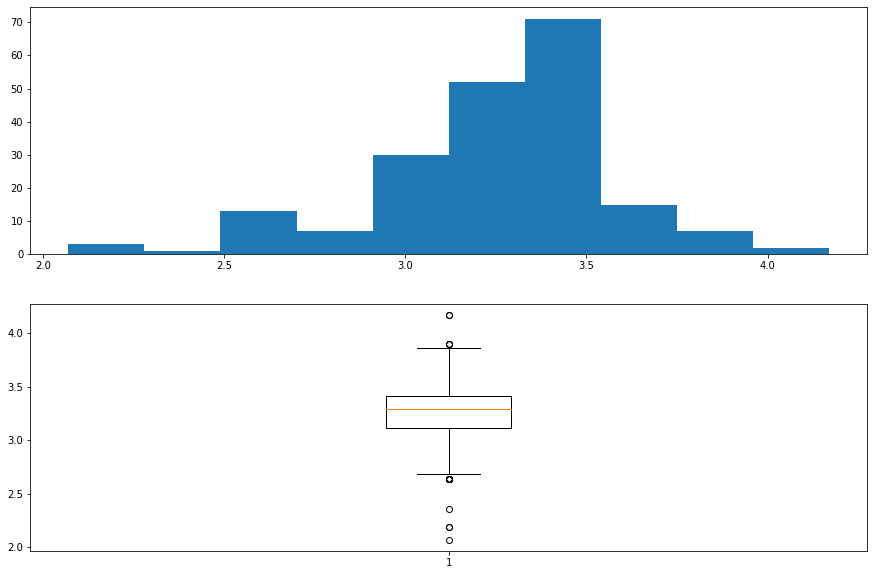

In [78]:
# graph of original data of stroke


df_q3.drop(index = df_q3[df_q3['stroke'] == '?'].index, inplace = True)
df_q3['stroke'] = pd.to_numeric(df_q3['stroke'])
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.hist(df_q3['stroke'])
plt.subplot(2, 1, 2)
plt.boxplot(df_q3['stroke'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9436324c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f943633e0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9436324940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f943633e670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f943633e940>],
 'means': []}

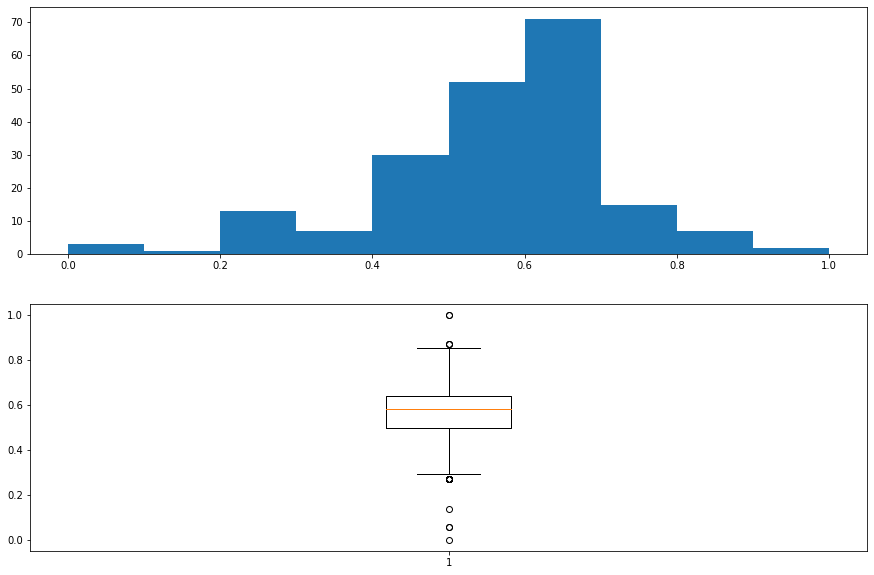

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_q3['stroke'] = scaler.fit_transform(
    df_q3['stroke'].to_numpy().reshape(-1, 1))

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.hist(df_q3['stroke'])
plt.subplot(2, 1, 2)
plt.boxplot(df_q3['stroke'])


##### Finding

From the above graph, I see that range between max value and min value is shortened. This is will fit into machine models.

#### Question 4
A:
1. symboling is numeric continuous data.
2. make is categorical nominal data.
3. engine type is categorical ordinal data.

B:

I will use binarizer method for numeric data to set value that less than 0 to -1, else to 1. For those two categorical data I will label encoding method to transform data.


In [ ]:
# use python code to transform the data

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0)
binarizer_feature = binarizer.fit_transform(df_q3[['symboling']])
binarizer_feature = pd.DataFrame(binarizer_feature)


label_encoding = LabelEncoder()
make = label_encoding.fit_transform(df_q3['make'])
engine_type = label_encoding.fit_transform(df_q3['engine-type'])

make = pd.DataFrame(make)
engine_type = pd.DataFrame(engine_type)
frames = [make,engine_type,binarizer_feature]





#### Question 5

In [63]:
le = LabelEncoder()

df['make'] = le.fit_transform(df['make'])
df['body-style'] = le.fit_transform(df['body-style'])
df['drive-wheels'] = le.fit_transform(df['drive-wheels'])
df['engine-type'] = le.fit_transform(df['engine-type'])
df['num-of-cylinders'] = le.fit_transform(df['num-of-cylinders'])
df['fuel-system'] = le.fit_transform(df['fuel-system'])
df['peak-rpm'] = le.fit_transform(df['peak-rpm'])
df['horsepower'] = le.fit_transform(df['horsepower'])
df['fuel-type'] = le.fit_transform(df['fuel-type'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['engine-location'] = le.fit_transform(df['engine-location'])
df['stroke'] = le.fit_transform(df['stroke'])
df['bore'] = le.fit_transform(df['bore'])
df['num-of-door'] = le.fit_transform(df['num-of-door'])
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace = True)
df['normalized-losses']

pca_test = df.drop(['wheel-base', 'length', 'width',
                   'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg'],axis = 1)


data_scaled = pd.DataFrame(preprocessing.scale(pca_test),columns = pca_test.columns)

pca = PCA(n_components= len(data_scaled.columns))
x_new = pca.fit_transform(data_scaled)
x_new = pd.DataFrame(x_new)

print(x_new)



ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values